DATA620 Fall 2019 Final Project Twitter Sentiment and Network Analysis Omar Pineda

Project Proposal:

Introduction: Elon Musk has been recognized for controversial posts on Twitter, many of which have been perceived as attempts to influence Tesla’s image and sometimes even its stock price. On August 7th, 2018, Musk tweeted that he would take Tesla private at $420 a stock, and this brought on scrutiny from the Securities and Exchange Committee (SEC), which ultimately led to him being fined and made to step down as Tesla’s Chairman on November 8th 2018. Before ending his tenure as Chairman, there were also concerns that Musk was being stretched thin by his responsibilities at the company. A year later, he has recently been promoting Tesla’s new “Cybertruck” over Twitter. The present analysis will assess differences in the general sentiment of Musk’s tweets before and after the SEC scandal of 2018, and it will also study Musk’s overall influence on his Twitter network.

Hypothesis Questions:
1.	Has the sentiment of Musk’s tweets changed after the SEC scandal of 2018 and consequential increased scrutiny on what he posts? I predict that his tweets became more positive under this heightened attention, and also because he was presumably less stressed by his responsibilities after stepping down as Chairman.
2.	How strong is the influence that Musk has on his Twitter network, and can we use his following to segment potential Tesla clientele?

Analysis Plan: I will conduct the sentiment analysis by splitting Musk’s tweets pre and post his position as Chairman of Tesla. After removing stop words, I will classify his tweets as either positive, negative or neutral and see if there is a statistically significant difference in these outcomes between the two periods. In assessing Musk’s influence over his followers, I will look at his retweets and attempt to find clusters among these users, which could possibly help form a segmentation of Tesla followers.
	
Concerns/Limitations: I have never used the Twitter API but I know that learning how to use it effectively will open the doors to many other future analyses, especially as they relate to Network Science and NLP. I am also concerned about how to address the stop words in the sentiment analysis as some of them may be needed for Musk’s more nuanced posts in order to effectively classify them as positive or negative.

Data Sources:
1.	https://towardsdatascience.com/elon-musk-twitter-adf324120b3f
2.	https://www.slideshare.net/ajayohri/twitter-analysis-by-kaify-rais
3.	https://analyzecore.com/2014/04/28/twitter-sentiment-analysis/
4.	https://towardsdatascience.com/generating-twitter-ego-networks-detecting-ego-communities-93897883d255
5.  https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
6.  http://adilmoujahid.com/posts/2014/07/twitter-analytics/
7.  https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
8.  http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html
9.	https://www.cnbc.com/2018/09/29/sec-settles-charges-with-teslas-elon-musk-will-remain-as-ceo.html

Video presentation link: https://www.youtube.com/watch?v=QC2_tjugVTA&feature=youtu.be

We start by importing Musk's tweets using the Tweepy package. We applied and were approved for a Twitter Developer account in order to use the API in Python. We've commented out our credentials below and saved the imported tweets as a text file. Musk's tweets through 12/9/2019 were pulled for this analysis. The code we used to retrieve tweets was adapted from the following site: http://adilmoujahid.com/posts/2014/07/twitter-analytics/

Musk's tweets from 12/18/2018 through 12/9/2019 were pulled for this analysis.

In [2]:
import tweepy

consumer_key = ###
consumer_secret = ###
access_token = ###
access_token_secret = ###


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
import sys
import jsonpickle
import os

searchQuery = '@elonmusk'
maxTweets = 10000
tweetsPerQry = 100 
fName = 'musk.txt'

sinceId = None

max_id=-1
tweetCount = 0
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry)
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry,
                                max_id=str(max_id - 1),
                                since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, 
                                count=tweetsPerQry,
                                max_id=str(max_id - 1))
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
            tweetCount += len(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

In [13]:
import json
import pandas as pd

tweets_data_path = 'musk.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [31]:
tweets = pd.DataFrame()
tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweets['TimeStamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['Name'] = list(map(lambda tweet: tweet["user"]["screen_name"], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['Favorites'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweets['Retweet'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweets['in_reply_to_screen_name'] = list(map(lambda tweet: tweet['in_reply_to_screen_name'], tweets_data))

According to a sentiment analysis (Part two in https://towardsdatascience.com/elon-musk-twitter-adf324120b3f) of Musk's tweets that was done with his posts through July 2018, Musk's tweets were generally more positive during the summer leading up to the SEC scandal.

The SEC scandal ocurred on August 7th, 2018 and he stepped down as Chairman of Tesla on November 8th 2018. The current analysis looks at his tweets starting about a month later on December 18th 2018. Here are the first 5 tweets out of the total 3,241 tweets in this analysis:

In [32]:
tweets.tail(5)

,tweet_id,TimeStamp,Name,text,Favorites,Retweet,in_reply_to_screen_name
3237,1075223430302060544,Wed Dec 19 02:56:57 +0000 2018,elonmusk,RT @OCTeslaClub: Always a party hanging with @...,0,182,None
3238,1075214848324100096,Wed Dec 19 02:22:51 +0000 2018,elonmusk,RT @IanPavelko: Just got 48.12.1\nKeep Climate...,0,730,None
3239,1075152373880782848,Tue Dec 18 22:14:35 +0000 2018,elonmusk,Boring product launch will be streamed live at...,22575,2807,None
3240,1075144691786539008,Tue Dec 18 21:44:04 +0000 2018,elonmusk,@kirstenkorosec @TechCrunch @boringcompany Bor...,612,43,kirstenkorosec
3241,1075138226094989312,Tue Dec 18 21:18:22 +0000 2018,elonmusk,@Model3Owners Same applies to those who didn’t...,593,33,elonmusk


Next, we conduct a sentiment analysis of these tweets using the VADER (Valence Aware Dictionary and Sentiment Reasoner) package as it is "specifically attuned to sentiments expressed in social media". First we retrieve compound, positive, neutral and negative scores for each of the posts and save these into a dataframe. 

In [19]:
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

In [26]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for i in range(0, len(tweets)):
    vs_compound.append(analyzer.polarity_scores(tweets['text'][i])['compound'])
    vs_pos.append(analyzer.polarity_scores(tweets['text'][i])['pos'])
    vs_neu.append(analyzer.polarity_scores(tweets['text'][i])['neu'])
    vs_neg.append(analyzer.polarity_scores(tweets['text'][i])['neg'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/omarpineda/nltk_data...


In [37]:
sentiment = pd.DataFrame({ 'tweet_id' : tweets['tweet_id'],
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
sentiment = sentiment[['tweet_id', 'Compound', 'Positive', 'Neutral', 'Negative']]
sentiment.head()

,tweet_id,Compound,Positive,Neutral,Negative
0,1204116819956494336,-0.1280,0.109,0.758,0.133
1,1203657942358036485,-0.3802,0.000,0.885,0.115
2,1203464422674485248,0.0000,0.000,1.000,0.000
3,1203463596346208257,0.6588,0.423,0.577,0.000
4,1203463366968135680,0.8122,0.412,0.588,0.000


We then join these scores to the table that we originally created so that we have all of our data in one place.

In [39]:
master = pd.merge(tweets, sentiment, on = 'tweet_id')
master.head(5)

,tweet_id,TimeStamp,Name,text,Favorites,Retweet,in_reply_to_screen_name,Compound,Positive,Neutral,Negative
0,1204116819956494336,Mon Dec 09 19:13:15 +0000 2019,elonmusk,RT @Teslarati: Tesla's Virtual Power Plant res...,0,450,None,-0.1280,0.109,0.758,0.133
1,1203657942358036485,Sun Dec 08 12:49:50 +0000 2019,elonmusk,RT @SpaceX: Capture confirmed! After 19 flight...,0,1698,None,-0.3802,0.000,0.885,0.115
2,1203464422674485248,Sun Dec 08 00:00:52 +0000 2019,elonmusk,@teslaownersSV We’ll aim to have it come out s...,11156,601,teslaownersSV,0.0000,0.000,1.000,0.000
3,1203463596346208257,Sat Dec 07 23:57:35 +0000 2019,elonmusk,@Kristennetten Your Twitter comments are great...,2953,87,Kristennetten,0.6588,0.423,0.577,0.000
4,1203463366968135680,Sat Dec 07 23:56:40 +0000 2019,elonmusk,Huge thanks to everyone who contributed ideas ...,146831,5201,None,0.8122,0.412,0.588,0.000


We also convert the Twitter timestamp to a date format and add this to our master table as 'nTimeStamp', including a year and month column in order to later on compute average sentiments for each month.

In [69]:
from datetime import datetime
from dateutil.parser import parse

nTimeStamp = []
year = []
month = []

for i in range(0, len(master)):
     nTimeStamp.append(parse(master['TimeStamp'][i]))
     year.append(parse(master['TimeStamp'][i]).year)
     month.append(parse(master['TimeStamp'][i]).month)
    
master['nTimeStamp'] = nTimeStamp
master['month'] = month

master.head()

,tweet_id,TimeStamp,Name,text,Favorites,Retweet,in_reply_to_screen_name,Compound,Positive,Neutral,Negative,nTimeStamp,year,month
0,1204116819956494336,Mon Dec 09 19:13:15 +0000 2019,elonmusk,RT @Teslarati: Tesla's Virtual Power Plant res...,0,450,None,-0.1280,0.109,0.758,0.133,2019-12-09 19:13:15+00:00,2019,12
1,1203657942358036485,Sun Dec 08 12:49:50 +0000 2019,elonmusk,RT @SpaceX: Capture confirmed! After 19 flight...,0,1698,None,-0.3802,0.000,0.885,0.115,2019-12-08 12:49:50+00:00,2019,12
2,1203464422674485248,Sun Dec 08 00:00:52 +0000 2019,elonmusk,@teslaownersSV We’ll aim to have it come out s...,11156,601,teslaownersSV,0.0000,0.000,1.000,0.000,2019-12-08 00:00:52+00:00,2019,12
3,1203463596346208257,Sat Dec 07 23:57:35 +0000 2019,elonmusk,@Kristennetten Your Twitter comments are great...,2953,87,Kristennetten,0.6588,0.423,0.577,0.000,2019-12-07 23:57:35+00:00,2019,12
4,1203463366968135680,Sat Dec 07 23:56:40 +0000 2019,elonmusk,Huge thanks to everyone who contributed ideas ...,146831,5201,None,0.8122,0.412,0.588,0.000,2019-12-07 23:56:40+00:00,2019,12


This then allows us to compute the monthly mean compound value for the sentiment of the tweets between December 2018 and December 2019. We can see that his tweets were positive in December 2018, a month after he stepped down as Chairman of Tesla. Contrary to our hypothesis, his tweets became less positive over the 6 months that followed. This decrease in positivity continued and bottomed out on the month of Musk's Birthday in June 2019, and his tweets have become increasingly positive since then, returning to their level of positivity from a year ago.

In [95]:
import numpy as np

g = master.groupby(["year", "month"])
monthly_averages = g.aggregate({"Compound":np.mean})

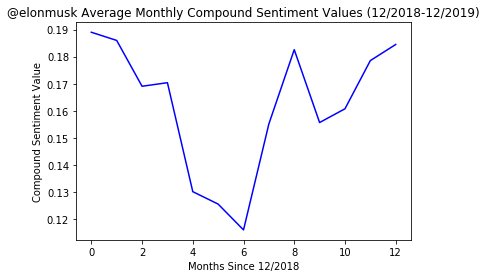

In [102]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,13)), monthly_averages['Compound'].values, 'b-')
plt.title('@elonmusk Average Monthly Compound Sentiment Values (12/2018-12/2019)')
plt.xlabel('Months Since 12/2018')
plt.ylabel('Compound Sentiment Value')
plt.show()

We can also retrieve Musk's most positive and negative tweets over the past year. His most positive tweet is about Tesla while his most negative text is a response to some other Twitter users.

In [109]:
print("Most positive: " + master.ix[master.Compound.argmax()].text)
print("Most negative: " + master.ix[master.Compound.argmin()].text)

Most positive: Super proud of Tesla team for great execution &amp; support of Tesla customers greatly appreciated!!
Most negative: @Erdayastronaut @Tyler0309 @TheVondo About right, but dangerously chuggy &amp; risking bad things at 40%. We’ll keep it… https://t.co/7VH4ou5tEu


/Users/omarpineda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/omarpineda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
/Users/omarpineda/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation 

Finally, we can also use a wordcloud to visualize the most common words that Musk uses in his tweets. It seems like many of his tweets are centered around his business ventures such as Tesla and SpaceX.

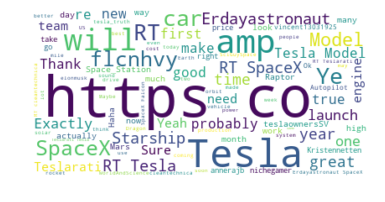

In [117]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords, max_words = 100).generate(" ".join([i for i in tweets[col]]))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

wordcloud(master,'text') 

For the second part of this project, we will analyze the network of users that Musk follows to see if we can draw any insights.

First, we retrieve information on who Elon Musk follows.

In [14]:
friend_ids = api.friends_ids(screen_name="elonmusk")
keys = []
values = []

for x in friend_ids[:200]:
    try: 
        profiles = api.get_user(id = x)
        keys.append(x)
        values.append(jsonpickle.encode(profiles._json, unpicklable=False))
    except:
        continue
        
temp_tweets_data = []
for line in values:
    try:
        temp_tweet = json.loads(line)
        temp_tweets_data.append(temp_tweet)
    except:
        continue

In [39]:
musk_follows = pd.DataFrame()
musk_follows['ID'] = list(map(lambda tweet: tweet["id"], temp_tweets_data))
musk_follows['Name'] = list(map(lambda tweet: tweet["name"], temp_tweets_data))
musk_follows['Screen Name'] = list(map(lambda tweet: tweet["screen_name"], temp_tweets_data))
musk_follows['Followers Count'] = list(map(lambda tweet: tweet["followers_count"], temp_tweets_data))
musk_follows['Favorites Count'] = list(map(lambda tweet: tweet["favourites_count"], temp_tweets_data))
musk_follows.sort_values(['Followers Count'], ascending = False, inplace = True)
musk_follows['Followed_By'] = '44196397'

We see that Musk follows many accounts that relate to science, space, and his business ventures.

In [97]:
musk_follows.head(n=10)

,ID,Name,Screen Name,Followers Count,Favorites Count,Followed_By
39,5402612,BBC Breaking News,BBCBreaking,41129297,0,44196397
65,11348282,NASA,NASA,34333078,8003,44196397
26,17471979,National Geographic,NatGeo,23550239,6639,44196397
9,19725644,Neil deGrasse Tyson,neiltyson,13572093,0,44196397
80,34743251,SpaceX,SpaceX,9409763,111,44196397
79,13298072,Tesla,Tesla,4621520,3261,44196397
63,1582853809,History In Pictures,HistoryInPics,4002103,184,44196397
27,137857547,Yusaku Maezawa (MZ) 前澤友作,yousuck2020,3838312,147,44196397
61,14647570,Scientific American,sciam,3799469,2848,44196397
44,19658826,New Scientist,newscientist,3567182,16165,44196397


Next, we get those who the 81 accounts that Musk follows in turn follow themselves.

In [30]:
following_key =[]
follower_follower = []
mfollows = musk_follows['ID'].tolist()[0:20]
for i in mfollows:
    following_key.append(i)
    friend_ids = api.friends_ids(id =i, count=10)
    follower_follower.append(friend_ids)

CPU times: user 565 ms, sys: 68 ms, total: 633 ms
Wall time: 15min 8s


In [32]:
import itertools
followers = list(itertools.chain(*follower_follower))
musk_ff_dict = dict(itertools.izip(following_key,follower_follower))

In [33]:
follower_info = []
for x in followers:
    try: 
        profiles = api.get_user(id = x)
        follower_info.append(jsonpickle.encode(profiles._json, unpicklable=False))
    except:
        continue

follower_tweets_data = []
for line in follower_info:
    try:
        temp_tweet = json.loads(line)
        follower_tweets_data.append(temp_tweet)
    except:
        continue

In [34]:
fff_df = pd.DataFrame() #create pandas dataframe
fff_df['ID'] = list(map(lambda tweet: tweet["id"], follower_tweets_data))
fff_df['Name'] = list(map(lambda tweet: tweet["name"], follower_tweets_data))
fff_df['Screen Name'] = list(map(lambda tweet: tweet["screen_name"], follower_tweets_data))
fff_df['Followers Count'] = list(map(lambda tweet: tweet["followers_count"], follower_tweets_data))
fff_df['Favorites Count'] = list(map(lambda tweet: tweet["favourites_count"], follower_tweets_data))
fff_df.sort_values(['Followers Count'], ascending = False, inplace = True)

Here we have the second layer to this network with information on follows for the 81 Twitter accounts that Musk follows.

In [35]:
fff_df.head(10)

,ID,Name,Screen Name,Followers Count,Favorites Count
141,813286,Barack Obama,BarackObama,110733073,11
59,34507480,Ariana Grande,ArianaGrande,68091028,42105
53,44196397,Elon Musk,elonmusk,30096660,4432
98,19923144,NBA,NBA,28823106,452
181,176566242,zayn,zaynmalik,28463804,788
1,742143,BBC News (World),BBCWorld,26291447,12
2,612473,BBC News (UK),BBCNews,10340289,42
137,181572333,Chance The Rapper,chancetherapper,8242426,15836
0,265902729,BBC Sport,BBCSport,8151118,1286
97,50811932,James Harden,JHarden13,6526513,99


In [36]:
fff_df['Followed_By'] = 0
for keys in musk_ff_dict.keys():
    fff_df.loc[fff_df['ID'].isin(musk_ff_dict[keys]),'Followed_By'] = keys    

In the last step of preparing this data, we combine the data on who Musk follows with the data on who they follow.

In [42]:
combined_df = musk_follows.append(fff_df)
combined_df.head()
combined_df.to_csv('twitterNetwork', encoding='utf-8') #save this dataframe into a csv

,ID,Name,Screen Name,Followers Count,Favorites Count,Followed_By
39,5402612,BBC Breaking News,BBCBreaking,41129297,0,44196397
65,11348282,NASA,NASA,34333078,8003,44196397
26,17471979,National Geographic,NatGeo,23550239,6639,44196397
9,19725644,Neil deGrasse Tyson,neiltyson,13572093,0,44196397
80,34743251,SpaceX,SpaceX,9409763,111,44196397


We have saved this outputted dataframe into a .csv file that we've posted on Github for easier consumption as we do below.

In [57]:
muskNetwork = pd.read_csv('https://raw.githubusercontent.com/omarp120/DATA620-Web-Analytics/master/twitterNetwork.csv')

,Unnamed: 0,ID,Name,Screen Name,Followers Count,Favorites Count,Followed_By
81,141,813286,Barack Obama,BarackObama,110733073,11,22677790
82,59,34507480,Ariana Grande,ArianaGrande,68091028,42105,1582853809
0,39,5402612,BBC Breaking News,BBCBreaking,41129297,0,44196397
1,65,11348282,NASA,NASA,34333078,8003,44196397
83,53,44196397,Elon Musk,elonmusk,30096660,4432,1582853809


Now we can do a network analysis of who Musk follows and those they follow. Below we can see the top 5 of these accounts in terms of their total general followers, though these aren't the followers that they have within this network that's centered around Musk.

In [58]:
muskNetwork.sort_values(['Followers Count'], ascending = False, inplace = True)
muskNetwork.head()

,Unnamed: 0,ID,Name,Screen Name,Followers Count,Favorites Count,Followed_By
81,141,813286,Barack Obama,BarackObama,110733073,11,22677790
82,59,34507480,Ariana Grande,ArianaGrande,68091028,42105,1582853809
0,39,5402612,BBC Breaking News,BBCBreaking,41129297,0,44196397
1,65,11348282,NASA,NASA,34333078,8003,44196397
83,53,44196397,Elon Musk,elonmusk,30096660,4432,1582853809


The network analysis below looks at how Musk, those he follows and those they follow are connected to one another. We use NetworkX to create our network from our dataframe.

In [101]:
import networkx as nx

muskf = nx.from_pandas_edgelist(muskNetwork, 'ID', 'Followed_By', edge_attr = ['Followers Count'])

Here you can see a visualization of what this network looks like. There are 267 total nodes, or user accounts, and the average degree is 2.02. This means that, on average, each Twitter account in this network follows two other Twitter accounts. We can see from this that some of those Musk's follows actually follow each other as well.

Name: 
Type: Graph
Number of nodes: 267
Number of edges: 270
Average degree:   2.0225


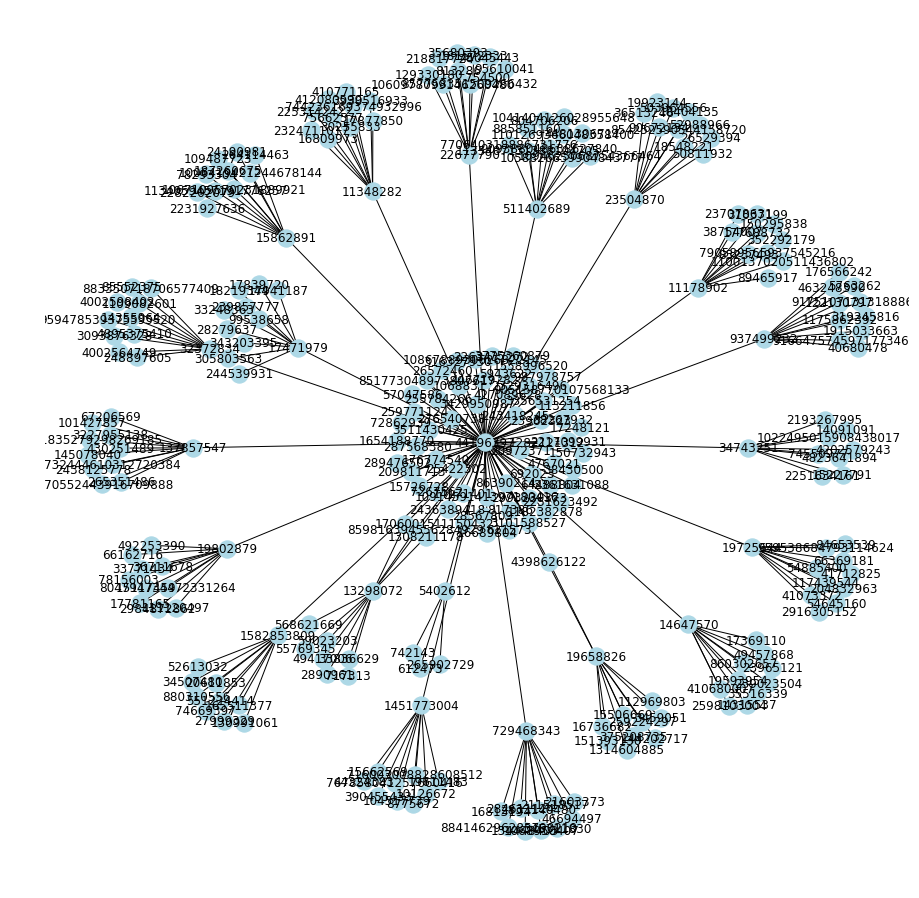

In [102]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(muskf)
nx.draw(muskf, pos=pos, with_labels = True, node_color='lightblue')
print(nx.info(muskf))

We can also see the top twenty accounts in this network by their degree centrality. Musk has the largest degree as this network is built around him and many of the accounts that follow him have degrees of 11.

In [103]:
deg = dict(nx.degree(muskf))
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
    return ms
dc = sorted_map(deg)
dc[0:19]

[(44196397, 81),
 (11178902, 11),
 (11348282, 11),
 (13298072, 11),
 (14647570, 11),
 (15862891, 11),
 (17471979, 11),
 (19658826, 11),
 (19725644, 11),
 (19802879, 11),
 (22677790, 11),
 (23504870, 11),
 (32372834, 11),
 (137857547, 11),
 (511402689, 11),
 (729468343, 11),
 (937499232, 11),
 (1451773004, 10),
 (1582853809, 10)]

Here is an example of an ego networks for one of the accounts that has a degree centrality of 11. This is the Twitter user with ID#11178902 which is the 'nybooks' account. We used a radius of two for this so that we could also see how this ego network relates to Musk's immediate network of those he follows. In this instance, Elon Musk follows 'nybooks' but none of the accounts that 'nybooks' follows follow Elon Musk back. In other words, the only account that connects these two clusters is 'nybooks'.

    Unnamed: 0        ID                          Name Screen Name  \
13          77  11178902  The New York Review of Books     nybooks   

    Followers Count  Favorites Count  Followed_By  
13          2286231             7062     44196397  


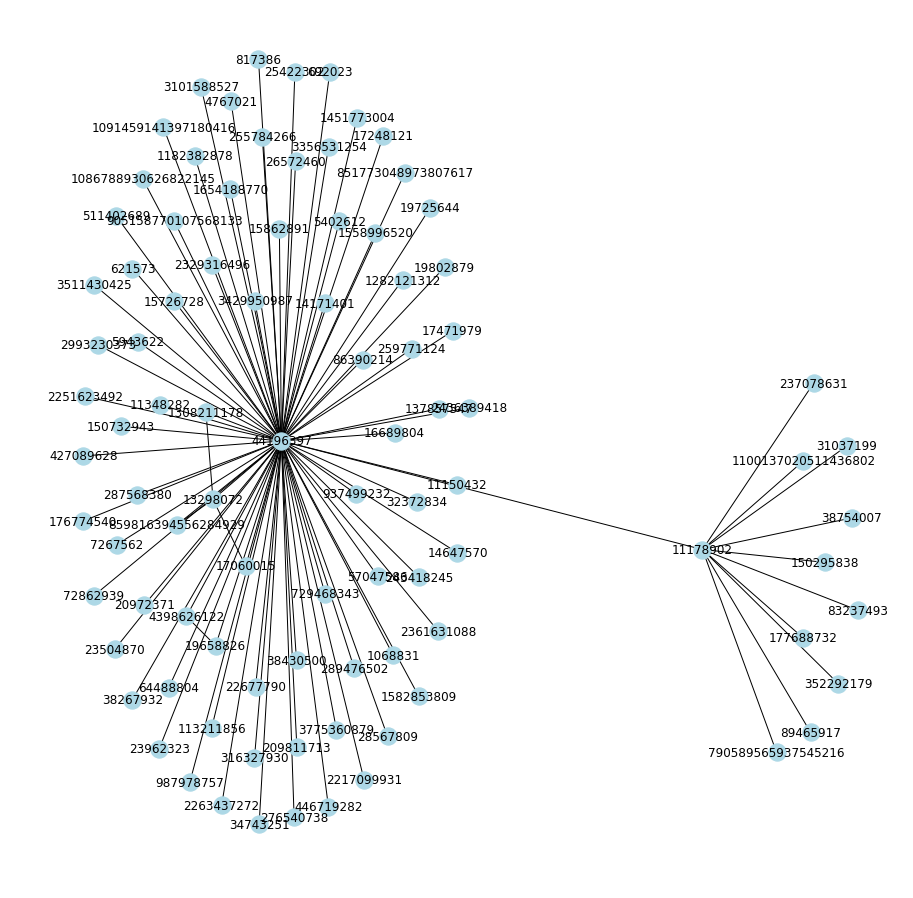

In [104]:
ego1 = nx.ego_graph(muskf, 11178902, radius = 2)
plt.figure(figsize=(12, 12))
nx.draw(ego1, with_labels = True, node_color = 'lightblue')
print(muskNetwork.loc[muskNetwork['ID'] == 11178902])

We can also assess the eigenvector centrality to see the influence a Twitter account has within this network. Again, Musk is the most well connected in this network, and he is followed by the Twitter user with ID#13298072 which is the account for Tesla.

In [106]:
ec = dict(nx.eigenvector_centrality_numpy(muskf))
ec2 = sorted_map(ec)
ec2[0:19]

[(44196397, 0.6924252750121116),
 (13298072, 0.11317508047821763),
 (19658826, 0.09462200778761692),
 (1308211178, 0.0875638841897306),
 (859816394556284929, 0.08756388418973057),
 (17060015, 0.08756388418973056),
 (4398626122, 0.08554727744747731),
 (19802879, 0.08534547144231668),
 (11178902, 0.08534547144231659),
 (11348282, 0.08534547144231656),
 (22677790, 0.08534547144231656),
 (511402689, 0.08534547144231656),
 (937499232, 0.08534547144231655),
 (137857547, 0.08534547144231654),
 (32372834, 0.08534547144231652),
 (729468343, 0.08534547144231652),
 (14647570, 0.08534547144231651),
 (19725644, 0.08534547144231651),
 (17471979, 0.0853454714423165)]

This makes sense since Musk and Tesla would follow similar accounts, and we can see this below with an ego network of Tesla in relation to Musk. Tesla follows three accounts that Musk also follows and these are: Teslarati, CleanTechnica and The Boring Company.

   Unnamed: 0        ID   Name Screen Name  Followers Count  Favorites Count  \
5          79  13298072  Tesla       Tesla          4621520             3261   

   Followed_By  
5     44196397  


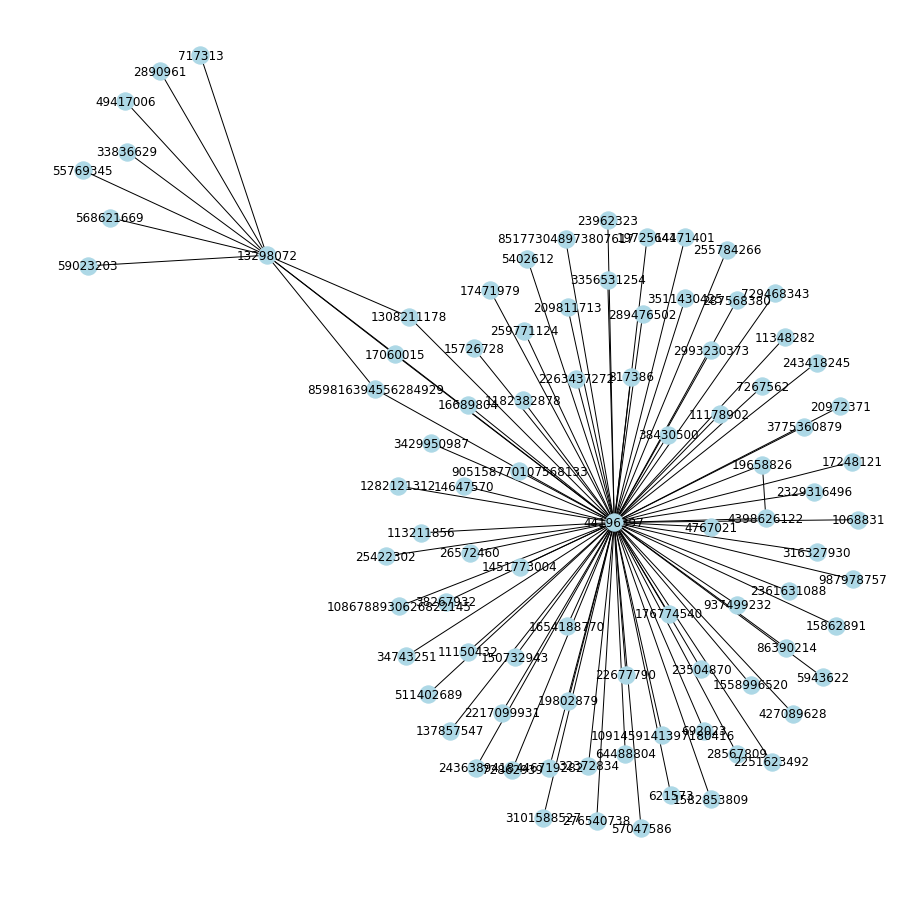

In [107]:
ego2 = nx.ego_graph(muskf, 13298072, radius = 2)
plt.figure(figsize=(12, 12))
nx.draw(ego2, with_labels = True, node_color = 'lightblue')
print(muskNetwork.loc[muskNetwork['ID'] == 13298072])

In [98]:
print(muskNetwork.loc[muskNetwork['ID'] == 1308211178])
print(muskNetwork.loc[muskNetwork['ID'] == 17060015])
print(muskNetwork.loc[muskNetwork['ID'] == 859816394556284929])

     Unnamed: 0          ID       Name Screen Name  Followers Count  \
138          45  1308211178  TESLARATI   Teslarati           154381   
137          34  1308211178  TESLARATI   Teslarati           154381   
53            8  1308211178  TESLARATI   Teslarati           154378   

     Favorites Count  Followed_By  
138             3956     13298072  
137             3956     13298072  
53              3956     44196397  
     Unnamed: 0        ID           Name    Screen Name  Followers Count  \
146          43  17060015  CleanTechnica  cleantechnica           111222   
56           28  17060015  CleanTechnica  cleantechnica           111219   

     Favorites Count  Followed_By  
146             3183     13298072  
56              3181     44196397  
     Unnamed: 0                  ID                Name    Screen Name  \
126          51  859816394556284929  The Boring Company  boringcompany   
125          33  859816394556284929  The Boring Company  boringcompany   
36          

In the last part of this network analysis, we implement the island method in order to reduce the size of our network using the Twitter user's total number of followers as a weight that can be used as a proxy for the influence that the users in this network have at a larger scale among all Twitter users.

In [109]:
#Code from textbook with a minor adjustment in the add_edge function so that it works with our version of networkx
def trim_edges(g, weight = 1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['Followers Count'] > weight:
            g2.add_edge(f,to,attr_dict = edata)
    return g2

def island_method(g, iterations = 5):
    weights = [edata['Followers Count'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [110]:
p_islands = island_method(muskf, iterations = 4)
p_islands

[[7, <networkx.classes.graph.Graph at 0x118450450>],
 [27683273, <networkx.classes.graph.Graph at 0x107ae2bd0>],
 [55366539, <networkx.classes.graph.Graph at 0x1081afa90>],
 [83049805, <networkx.classes.graph.Graph at 0x107b81c10>],
 [110733071, <networkx.classes.graph.Graph at 0xa1d200a10>]]

We have five thresholds to consider in our output, and visually our networks at each of the water levels look like the following:

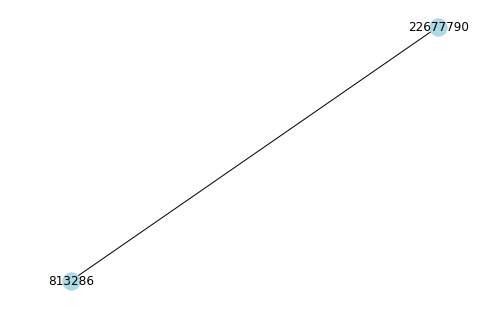

In [118]:
nx.draw(p_islands[4][1], with_labels = True, node_color = 'lightblue')

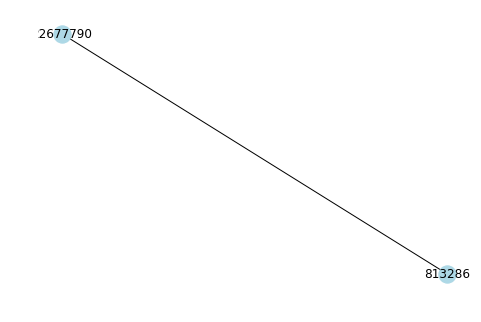

In [119]:
nx.draw(p_islands[3][1], with_labels = True, node_color = 'lightblue')

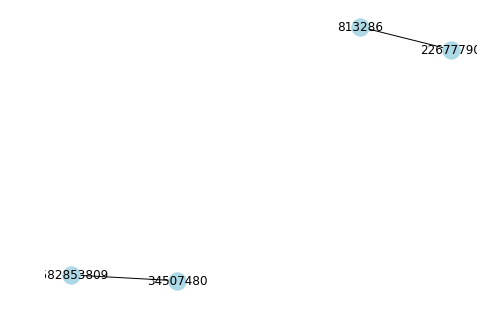

In [120]:
nx.draw(p_islands[2][1], with_labels = True, node_color = 'lightblue')

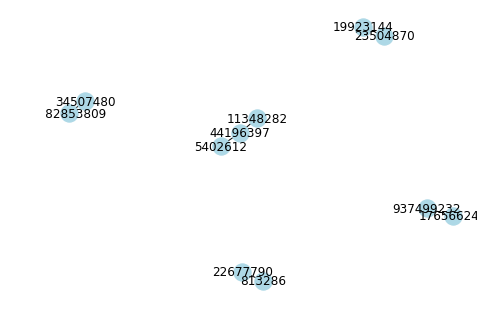

In [121]:
nx.draw(p_islands[1][1], with_labels = True, node_color = 'lightblue')

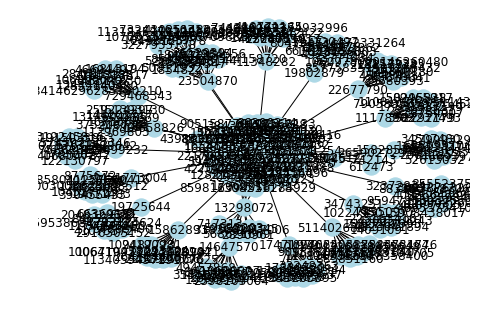

In [122]:
nx.draw(p_islands[0][1], with_labels = True, node_color = 'lightblue')

We'll look out our second water level which consists of 5 islands of Twitter users in this network. There are 11 nodes, or Twitter users, 6 edges and an average degree of 1.09. These are the 11 most involved Twitter users in this network and they are presumably also the most influential based on their general follower counts.

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 6
Average degree:   1.0909


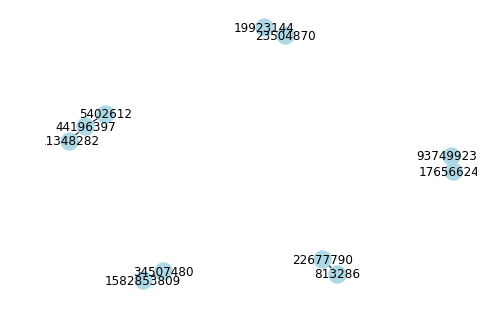

In [125]:
twitterUsers = p_islands[1][1]
nx.draw(twitterUsers, with_labels = True, node_color = 'lightblue')
print(nx.info(twitterUsers))

These are the users at this water level: Malala, zaynmalik, BarackObama, SouthPark, NBA, Elon Musk, HistoryInPics, BBC Breaking, Ariana Grande, NASA, and Jon_Favreau.

In [126]:
twitterUsers.nodes()

NodeView((937499232, 176566242, 813286, 23504870, 19923144, 44196397, 1582853809, 5402612, 34507480, 11348282, 22677790))

In [127]:
print(muskNetwork.loc[muskNetwork['ID'] == 937499232])
print(muskNetwork.loc[muskNetwork['ID'] == 176566242])
print(muskNetwork.loc[muskNetwork['ID'] == 813286])
print(muskNetwork.loc[muskNetwork['ID'] == 23504870])
print(muskNetwork.loc[muskNetwork['ID'] == 19923144])
print(muskNetwork.loc[muskNetwork['ID'] == 44196397])
print(muskNetwork.loc[muskNetwork['ID'] == 1582853809])
print(muskNetwork.loc[muskNetwork['ID'] == 5402612])
print(muskNetwork.loc[muskNetwork['ID'] == 34507480])
print(muskNetwork.loc[muskNetwork['ID'] == 11348282])
print(muskNetwork.loc[muskNetwork['ID'] == 22677790])

    Unnamed: 0         ID    Name Screen Name  Followers Count  \
18          43  937499232  Malala      Malala          1533743   

    Favorites Count  Followed_By  
18             1469     44196397  
    Unnamed: 0         ID  Name Screen Name  Followers Count  Favorites Count  \
85         181  176566242  zayn   zaynmalik         28463804              788   

    Followed_By  
85    937499232  
    Unnamed: 0      ID          Name  Screen Name  Followers Count  \
81         141  813286  Barack Obama  BarackObama        110733073   

    Favorites Count  Followed_By  
81               11     22677790  
    Unnamed: 0        ID        Name Screen Name  Followers Count  \
10          60  23504870  South Park   SouthPark          3001075   

    Favorites Count  Followed_By  
10             5699     44196397  
    Unnamed: 0        ID Name Screen Name  Followers Count  Favorites Count  \
84          98  19923144  NBA         NBA         28823106              452   

    Followed_By  
8

Conclusion

We have learned alot about Elon Musk by analyzing the content of his tweets and the network of users that he follows. His tweets over the past year have generally been positive, but they were increasingly less positive after December 2018 and bottomed out in June 2018. Since then, his tweets have become more positive and returned to their sentiment levels from this time last year. It doesn't seem that the sentiment of his tweets have changed all that much since stepping down as Chairman of Tesla, and if anything they became less positive in the 6 months that followed this event.

Musk follows a total of 81 Twitter accounts, and if we look at those he follows and those they in turn follow, there are a total of 267 Twitter users in the network of our analysis. After Elon Musk, the most connected Twitter acounts in this network have a degree of 11, such as the account for nybooks. The Twitter Tesla account has the highest eigenvector centrality, so it has the biggest influence in this network and this makes sense as this network to begin with is centered around Elon Musk. Lastly, simplyifying this small network through the island method revealed other top Twitter accounts that can have a large influence on the overall Twitter community. This simplification of our network included accounts such as Barrack Obama, BBC and Ariana Grande in the final result.

In future work, it would be interesting to see how Musk's future tweets fare in terms of their sentiment as there might be a seasonal component to them where they peak in positivity in the Fall/Winter. Another network analysis can look at a sample of the 30.1M users that follow @elonmusk.